In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import QuantileTransformer, PolynomialFeatures

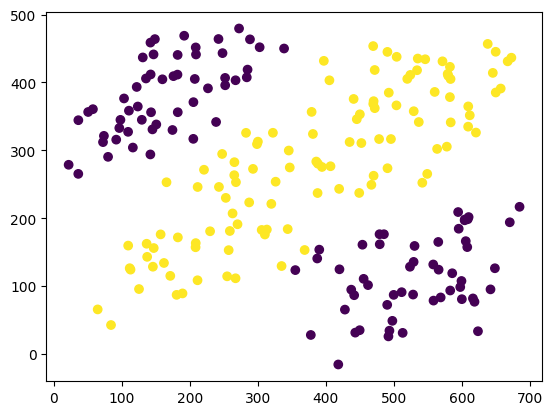

In [2]:
df = pd.read_csv('drawndata2.csv')
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

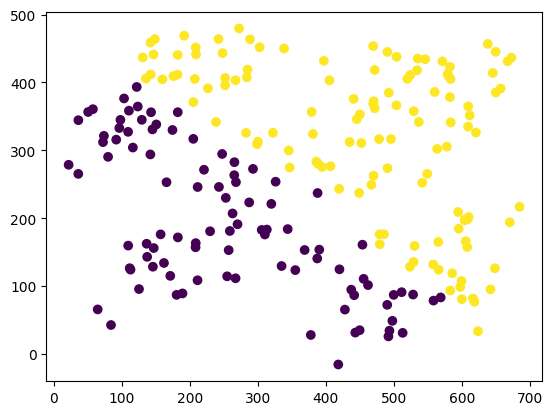

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=100)),
    ('model', LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.show()

## The model does not look good, we should still have our yellow inthe middle or better still , it should keep 2 lines in btw

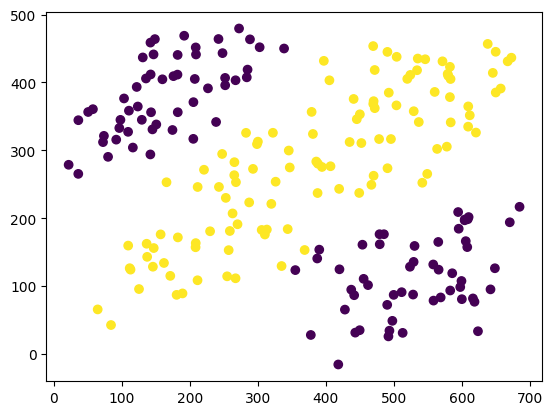

In [6]:
pipe = Pipeline([
    ('scale', PolynomialFeatures()),
    ('model', LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.show()

## From the above, we have only worked on numeric data, what if we work on categorical data?

In [17]:
arr = np.array(['low', 'low', 'high', 'medium']).reshape(-1, 1)

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
# We can set sparse to false to see its content
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

## From the above fitted data, if we try to transform a value that is not in arr, it would give an error unless we set our handle_unknown to ignore

In [27]:
enc.transform([['zero']])

array([[0., 0., 0.]])

## THe handle unknown is a useful settings if we are generating our X but we do not want to do this when we are generating our y label